In [ ]:
# import joblib
# import pandas as pd
# import re
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression

# nltk.download("stopwords")

# # Load dataset
# df = pd.read_csv("train.csv")  # Update with actual path
# df = df.dropna()  # Drop missing values

# # Preprocessing function
# stemmer = PorterStemmer()
# def preprocess_text(text):
#     text = re.sub(r'[^a-zA-Z]', ' ', text)
#     text = text.lower().split()
#     text = [stemmer.stem(word) for word in text if word not in stopwords.words('english')]
#     return " ".join(text)

# df["processed"] = df["text"].apply(preprocess_text)

# # Vectorization
# vectorizer = TfidfVectorizer(max_features=5000)
# X = vectorizer.fit_transform(df["processed"])
# y = df["label"].values  # Assuming a "label" column where 1 = Fake, 0 = Real

# # Train/test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train model
# model = LogisticRegression()
# model.fit(X_train, y_train)

# # Save vectorizer and model
# joblib.dump(vectorizer, "vectorizer.pkl")
# joblib.dump(model, "fake_news_model.pkl")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['fake_news_model.pkl']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.9434
Precision: 0.9453
Recall: 0.9219
F1 Score: 0.9335


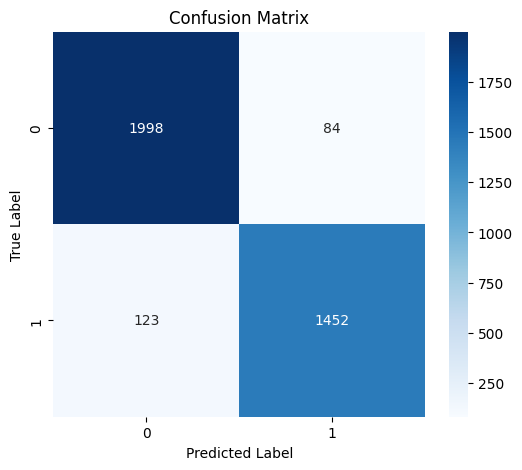

Epoch 1 - Train Accuracy: 0.9683, Test Accuracy: 0.9434
Epoch 2 - Train Accuracy: 0.9683, Test Accuracy: 0.9434
Epoch 3 - Train Accuracy: 0.9683, Test Accuracy: 0.9434
Epoch 4 - Train Accuracy: 0.9683, Test Accuracy: 0.9434
Epoch 5 - Train Accuracy: 0.9683, Test Accuracy: 0.9434
Epoch 6 - Train Accuracy: 0.9683, Test Accuracy: 0.9434
Epoch 7 - Train Accuracy: 0.9683, Test Accuracy: 0.9434
Epoch 8 - Train Accuracy: 0.9683, Test Accuracy: 0.9434
Epoch 9 - Train Accuracy: 0.9683, Test Accuracy: 0.9434
Epoch 10 - Train Accuracy: 0.9683, Test Accuracy: 0.9434


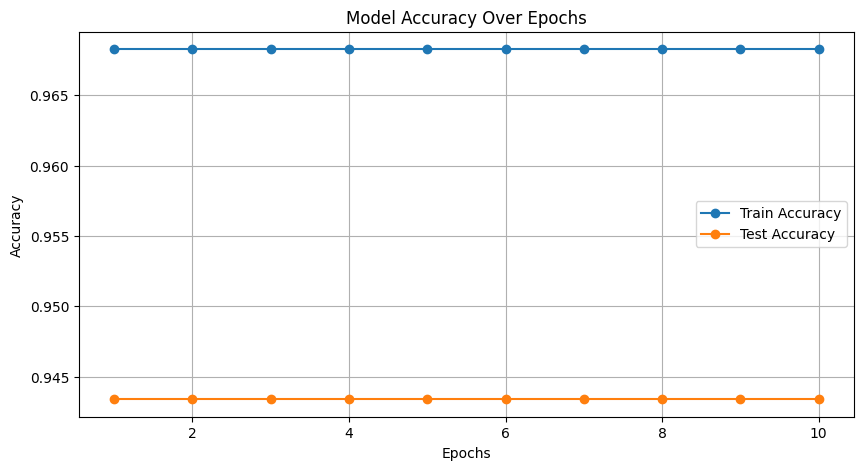

['fake_news_model.pkl']

In [1]:
import joblib
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

nltk.download("stopwords")

# Load dataset
df = pd.read_csv("train.csv")  # Update with actual path
df = df.dropna()  # Drop missing values

# Preprocessing function
stemmer = PorterStemmer()
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower().split()
    text = [stemmer.stem(word) for word in text if word not in stopwords.words('english')]
    return " ".join(text)

df["processed"] = df["text"].apply(preprocess_text)

# Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["processed"])
y = df["label"].values  # Assuming a "label" column where 1 = Fake, 0 = Real

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plotting Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plotting Accuracy and Loss Graphs
train_accuracies = []
test_accuracies = []

epochs = 10
for epoch in range(1, epochs + 1):
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    print(f"Epoch {epoch} - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_accuracies, label='Train Accuracy', marker='o')
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Save vectorizer and model
joblib.dump(vectorizer, "vectorizer.pkl")
joblib.dump(model, "fake_news_model.pkl")